# Decision tree Implementaion and Post pruning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
dataset = load_iris()

In [4]:
# creating dataset using seaborn

import seaborn as sns
df = sns.load_dataset('iris')

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Separating x and y variables

In [7]:
x = df.iloc[:,:-1]

y = dataset.target

## Train test split

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.33, random_state = 42)

# Implementing Decision tree

Note: No need for Standarization/ Feature scaling as there will be no effect of standardization in data splitting.

In [9]:
from sklearn.tree import DecisionTreeClassifier

1.) Post Pruning technique

In [10]:
treeclassifier = DecisionTreeClassifier()

In [11]:
treeclassifier.fit(x_train, y_train)

DecisionTreeClassifier()

[Text(0.5416666666666666, 0.9285714285714286, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.4583333333333333, 0.7857142857142857, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.8571428571428572, 'True  '),
 Text(0.625, 0.7857142857142857, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5833333333333333, 0.8571428571428572, '  False'),
 Text(0.4166666666666667, 0.6428571428571429, 'x[2] <= 5.35\ngini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.3333333333333333, 0.5, 'x[0] <= 4.95\ngini = 0.105\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[3] <= 1.35\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.08333333333333333, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.35714285714285715, 'x[1] <= 2.25\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(0

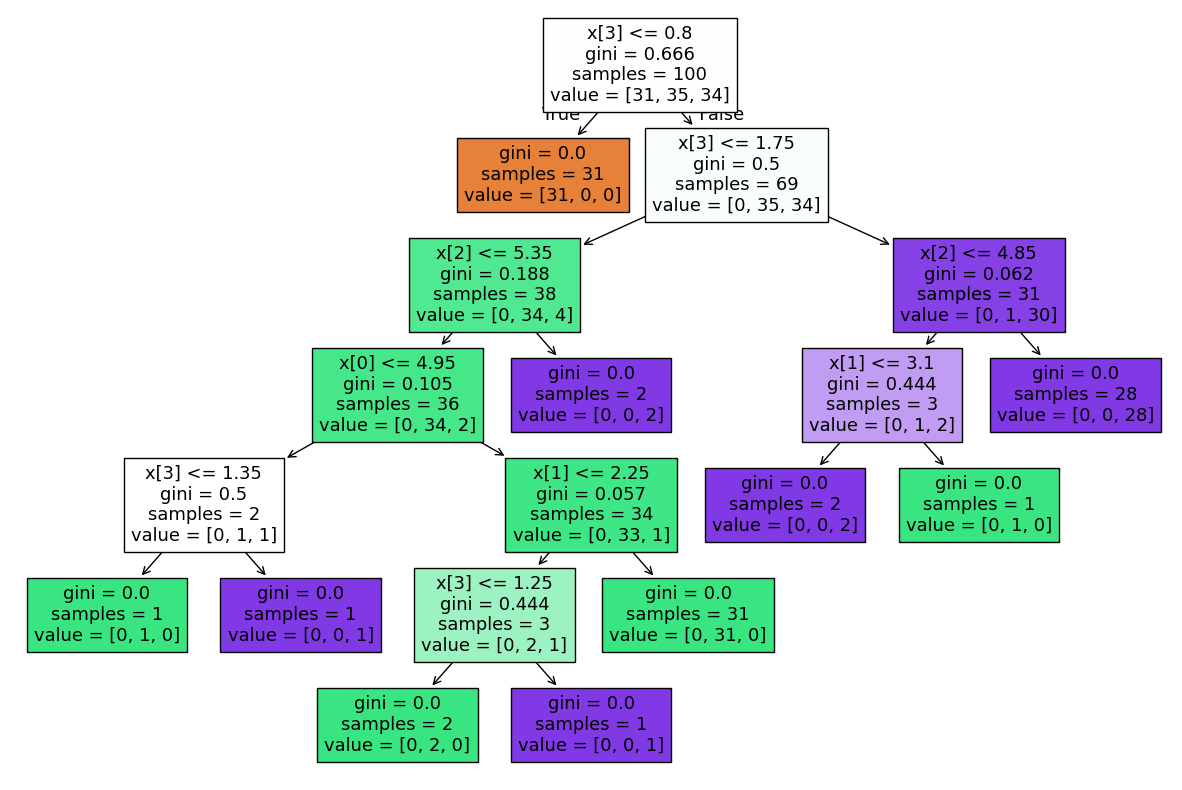

In [12]:
# Visualizing the created tree

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(treeclassifier, filled = True)

# Postpruning

In [13]:
# Postpruning with max depth = 2

treeclassifierPost = DecisionTreeClassifier(max_depth = 2)

In [14]:
treeclassifierPost.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

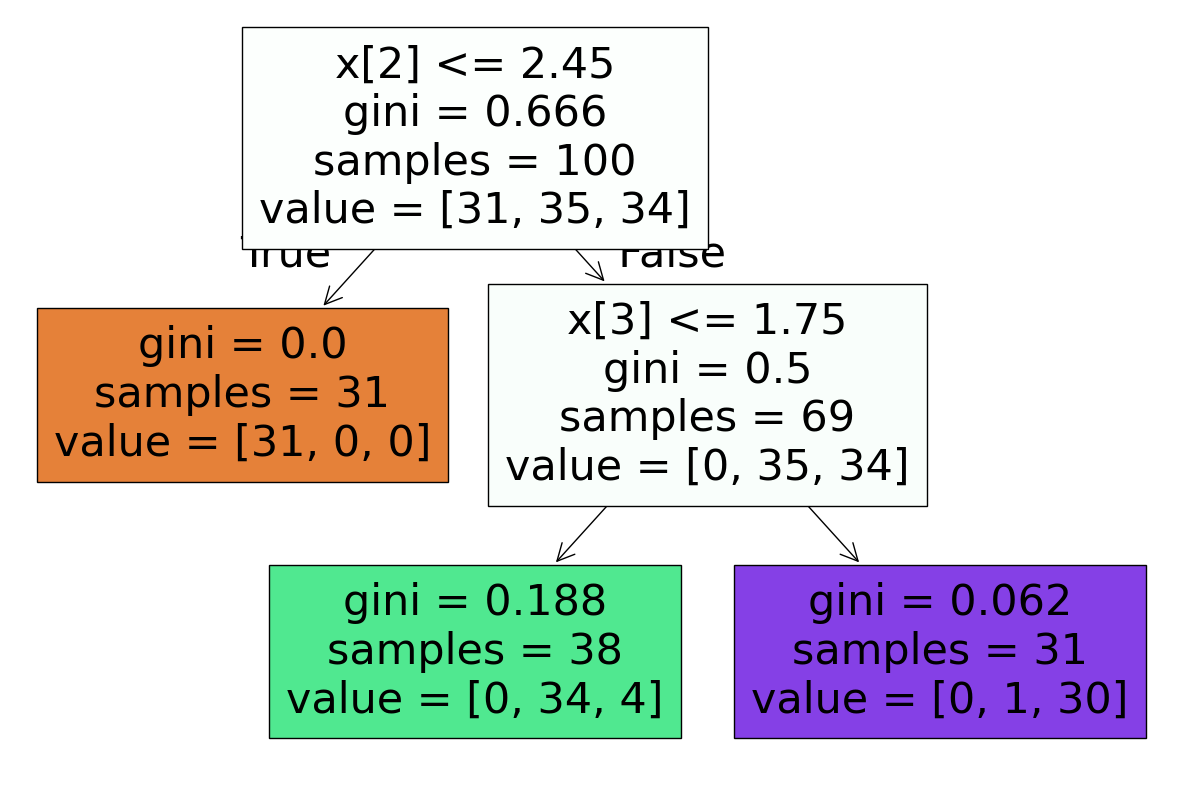

In [16]:
# Visualizing the created tree with Post pruning

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(treeclassifierPost, filled = True)

In [17]:
y_pred = treeclassifierPost.predict(x_test)

In [18]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

# Performance metrics

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [20]:
print("Confusion matrix -> \n", confusion_matrix(y_test, y_pred))

print("Accuracy score -> ", accuracy_score(y_test, y_pred))

print("Classification report -> \n", classification_report(y_test, y_pred))

Confusion matrix -> 
 [[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]
Accuracy score ->  0.98
Classification report -> 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Internal Assignment

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
dataset1 = load_breast_cancer()

In [24]:
df1 = pd.DataFrame(dataset1.data, columns = dataset1.feature_names)

In [25]:
df1.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
dataset1.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [31]:
dataset1.target_names

array(['malignant', 'benign'], dtype='<U9')

In [33]:
x1 = df1

y1 = dataset1.target

In [34]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size =0.33, random_state = 42)

In [35]:
# Implementing a decision tree

treeclassifier1 = DecisionTreeClassifier()

In [36]:
treeclassifier1.fit(x_train1, y_train1)

DecisionTreeClassifier()

[Text(0.5384615384615384, 0.9375, 'x[7] <= 0.051\ngini = 0.471\nsamples = 381\nvalue = [145.0, 236.0]'),
 Text(0.36538461538461536, 0.8125, 'x[20] <= 16.83\ngini = 0.098\nsamples = 233\nvalue = [12, 221]'),
 Text(0.45192307692307687, 0.875, 'True  '),
 Text(0.2692307692307692, 0.6875, 'x[10] <= 0.626\ngini = 0.045\nsamples = 219\nvalue = [5, 214]'),
 Text(0.19230769230769232, 0.5625, 'x[24] <= 0.178\ngini = 0.027\nsamples = 216\nvalue = [3, 213]'),
 Text(0.15384615384615385, 0.4375, 'x[14] <= 0.003\ngini = 0.018\nsamples = 215\nvalue = [2, 213]'),
 Text(0.07692307692307693, 0.3125, 'x[12] <= 1.568\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.038461538461538464, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.11538461538461539, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.23076923076923078, 0.3125, 'x[21] <= 33.35\ngini = 0.009\nsamples = 211\nvalue = [1, 210]'),
 Text(0.19230769230769232, 0.1875, 'gini = 0.0\nsamples = 199\nvalue = [0, 199]'),
 Text(

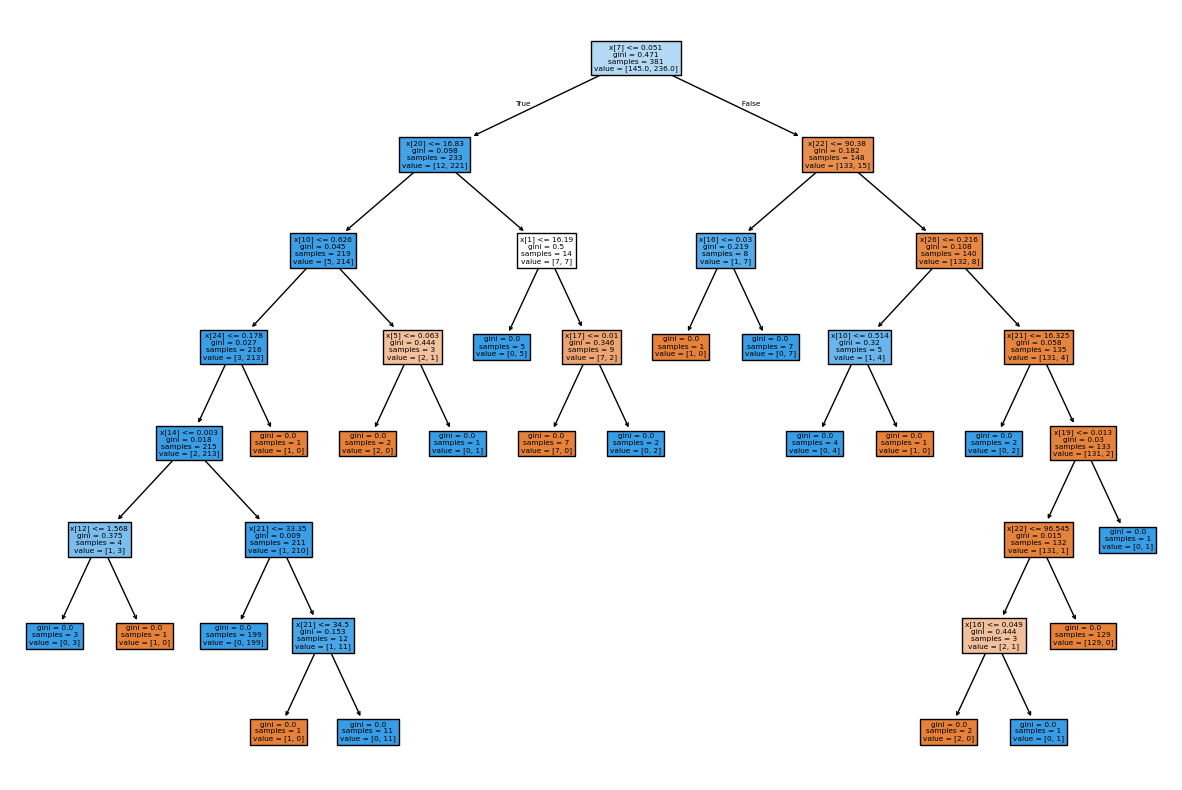

In [38]:
# Visualizing the created tree

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(treeclassifier1, filled = True)

In [46]:
treeclassifierPost1  = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

In [47]:
treeclassifierPost1.fit(x_train1, y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5769230769230769, 0.875, 'x[7] <= 0.051\nentropy = 0.958\nsamples = 381\nvalue = [145.0, 236.0]'),
 Text(0.3076923076923077, 0.625, 'x[20] <= 16.83\nentropy = 0.293\nsamples = 233\nvalue = [12, 221]'),
 Text(0.4423076923076923, 0.75, 'True  '),
 Text(0.15384615384615385, 0.375, 'x[10] <= 0.626\nentropy = 0.157\nsamples = 219\nvalue = [5, 214]'),
 Text(0.07692307692307693, 0.125, 'entropy = 0.106\nsamples = 216\nvalue = [3, 213]'),
 Text(0.23076923076923078, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [2, 1]'),
 Text(0.46153846153846156, 0.375, 'x[26] <= 0.221\nentropy = 1.0\nsamples = 14\nvalue = [7, 7]'),
 Text(0.38461538461538464, 0.125, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.5384615384615384, 0.125, 'entropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(0.8461538461538461, 0.625, 'x[22] <= 114.45\nentropy = 0.473\nsamples = 148\nvalue = [133, 15]'),
 Text(0.7115384615384615, 0.75, '  False'),
 Text(0.7692307692307693, 0.375, 'x[21] <= 25.655\nentropy = 0.98

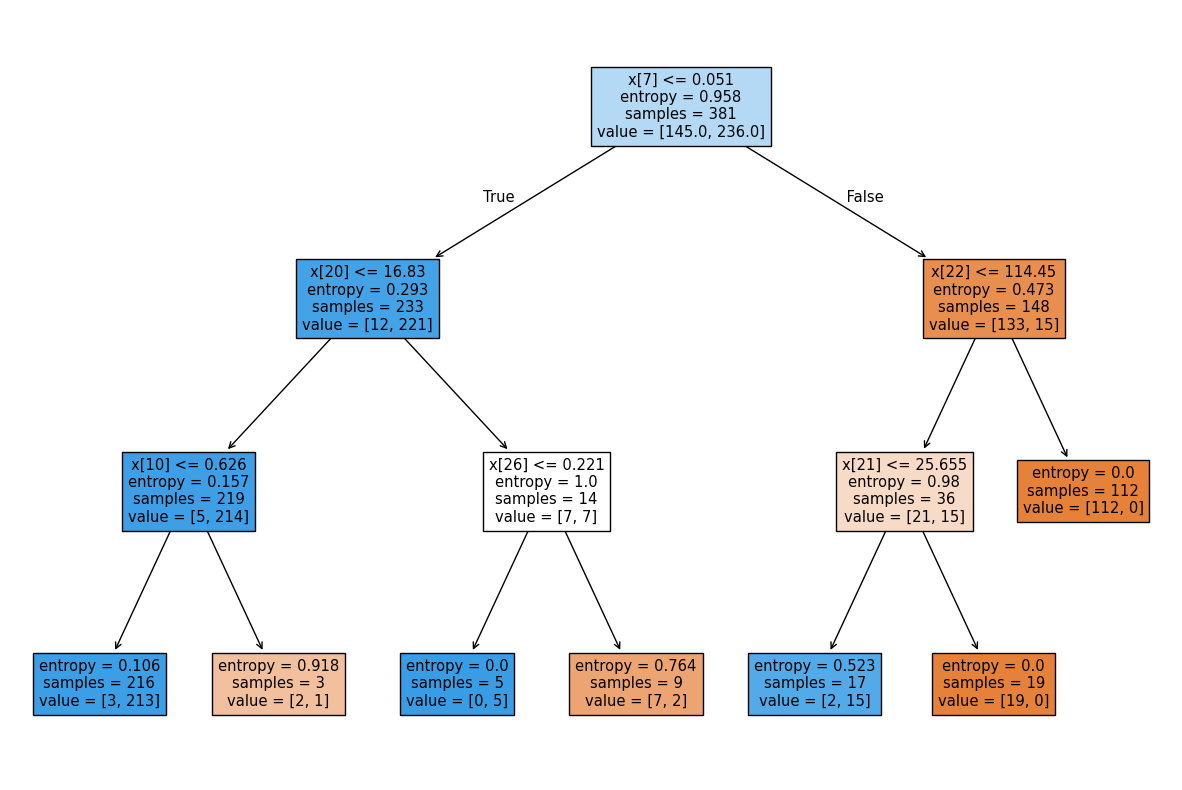

In [48]:
# Visualizing the created tree with Post pruning

from sklearn import tree
plt.figure(figsize =(15,10))

tree.plot_tree(treeclassifierPost1, filled = True)

In [49]:
y_pred1 = treeclassifierPost1.predict(x_test1)

# Performance metrics for Breast Cancer dataset

In [50]:
print("Confusion matrix -> \n", confusion_matrix(y_test1, y_pred1))

print("Accuracy score -> ", accuracy_score(y_test1, y_pred1))

print("Classification report -> \n", classification_report(y_test1, y_pred1))

Confusion matrix -> 
 [[ 59   8]
 [  3 118]]
Accuracy score ->  0.9414893617021277
Classification report -> 
               precision    recall  f1-score   support

           0       0.95      0.88      0.91        67
           1       0.94      0.98      0.96       121

    accuracy                           0.94       188
   macro avg       0.94      0.93      0.94       188
weighted avg       0.94      0.94      0.94       188



**Analysis:** I applied both gini and entropy criterion in treeClassifierPost1, but I got little bit of more accuracy score in "gini" than "entropy".